# Using Convolutional Neural Networks

Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'Dogs vs Cats'

We're going to try to create a model to enter the [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats) competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): *"**State of the art**: The current literature suggests machine classifiers can score above 80% accuracy on this task"*. So if we can beat 80%, then we will be at the cutting edge as of 2013!

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [32]:
%matplotlib inline

Define path to data: (It's a good idea to put it in a subdirectory of your notebooks folder, and then exclude that directory from git control by adding it to .gitignore.)

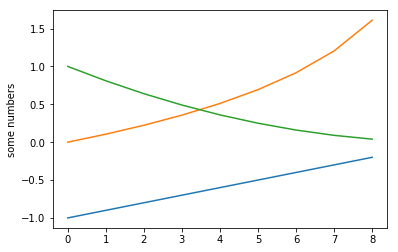

[(-1.0, -0.0, 1.0),
 (-0.9, 0.10536051565782628, 0.81),
 (-0.8, 0.2231435513142097, 0.6400000000000001),
 (-0.7000000000000001, 0.3566749439387323, 0.4900000000000001),
 (-0.6000000000000001, 0.5108256237659905, 0.3600000000000001),
 (-0.5, 0.6931471805599453, 0.25),
 (-0.4, 0.916290731874155, 0.16000000000000003),
 (-0.30000000000000004, 1.203972804325936, 0.09000000000000002),
 (-0.2, 1.6094379124341003, 0.04000000000000001)]

In [52]:
import math
nums = [(x*-0.1, -1*math.log(x*0.1),(x*-0.1)**2) for x in range(10,1,-1)]


import matplotlib.pyplot as plt
plt.plot(nums)
# plt.axis([0,10,0,10])


plt.ylabel('some numbers')
plt.show()

nums

In [2]:
path = "kgdata/"
#path = "data/dogscats/sample/"

In [3]:
import os
import shutil
import random

def create_validation_batch(folder) :
    train_path = path + "/train/" + folder
    photos = os.listdir(train_path)
    random.shuffle(photos)
    validation_sample = photos[:len(photos)/4]
    for photo in validation_sample :
        shutil.move(train_path + photo, path + "/valid/" + folder + photo)

In [24]:
#create_validation_batch("cats/")
#create_validation_batch("dogs/")

A few basic libraries that we'll need for the initial exercises:

In [4]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [5]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


# Use a pretrained VGG model with our **Vgg16** class

In [6]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [7]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.
Epoch 1/1
18750/18750 [==============================] - 664s - loss: 0.1228 - acc: 0.9690 - val_loss: 0.0591 - val_acc: 0.9816


The code above will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.

Let's take a look at how this works, step by step...

In [9]:
predictions = vgg.test(path)

Found 12500 images belonging to 3 classes.


In [12]:
def get_filename(s):
    return int(s[0][len('test/'):-len('.jpg')])

filenames_predictions = zip(predictions[0].filenames, predictions[1])
sorted_results = sorted(filenames_predictions,key=get_filename)

def parse_result(x):
    return str(x[0][len('test/'):-len('.jpg')] + ',' + str(x[1][1]))

parsed_results = np.array([parse_result(x) for x in sorted_results])

np.savetxt("submission.csv", parsed_results,  fmt='%s')